In [1]:
# reference https://www.tensorflow.org/tutorials/load_data/images
import os
import glob
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

data_dir = pathlib.Path('./')

# get flower category
classes_name = np.array([item.name for item in data_dir.glob('*/*') if item.name != "LICENSE.txt"])
# count image number
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print("flower category: {0}".format(classes_name))
print("number image: {0}".format(image_count))


# dataset is divided into three sets: 1)train set 2)validation set 3)test set
# define train_dir 
train_dir = os.path.join(data_dir, 'train')

# define validation dir
val_dir = os.path.join(data_dir, 'val')

# define test dir
test_dir = os.path.join(data_dir, 'test')



flower category: ['sunflowers' 'roses' 'dandelion' 'daisy' 'tulips'
 'load_data-checkpoint.ipynb' 'data_EDA-checkpoint.ipynb']
number image: 3670


In [2]:
dataset = {}
for category in classes_name:
    dataset[category] = data_dir.glob( '*/{0}/*.jpg'.format(category))

# get category count
# class_count = [len(list(data)) for category, data in dataset.items()]
# print(class_count)

train_data = []
for index, category in enumerate(classes_name):
    for img_path in list(dataset[category]):
        # image path and class label
        train_data.append([img_path, index])
# get DataFrame from List
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

# shuffle the dataset
train_data = train_data.sample(frac=1.).reset_index(drop=True)
print(train_data.head())

                                               image  label
0  flower_photo/dandelion/4258272073_f616d1e575_m...      2
1   flower_photo/tulips/12916017805_1cde91a891_n.jpg      4
2     flower_photo/roses/4360743371_6238b36d8c_m.jpg      1
3    flower_photo/daisy/14332947164_9b13513c71_m.jpg      3
4   flower_photo/sunflowers/164672339_f2b5b164f6.jpg      0


2    898
4    799
0    699
1    641
3    633
Name: label, dtype: int64


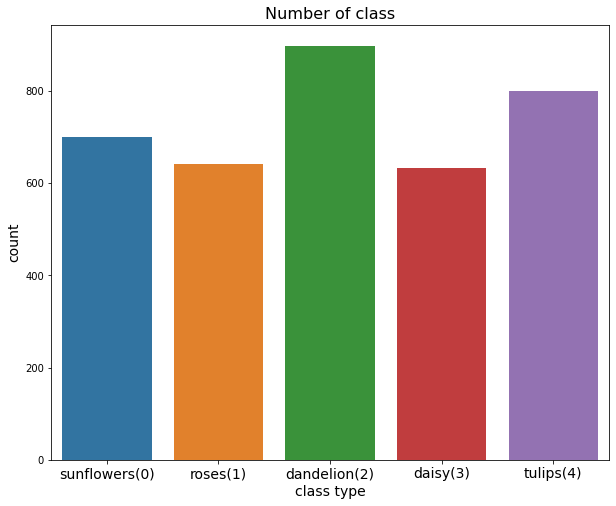

In [3]:
# get count for each class
class_count = train_data['label'].value_counts()
print(class_count)

# get xticks label
xticks_label = ['{0}({1})'.format(name, index) for index, name in enumerate(classes_name)]
# plot result
plt.figure(figsize=(10, 8))
sns.countplot(train_data.label)
plt.title('Number of class', fontsize=16)
plt.xlabel('class type', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(range(len(class_count.index)), xticks_label, fontsize=14)
plt.show()


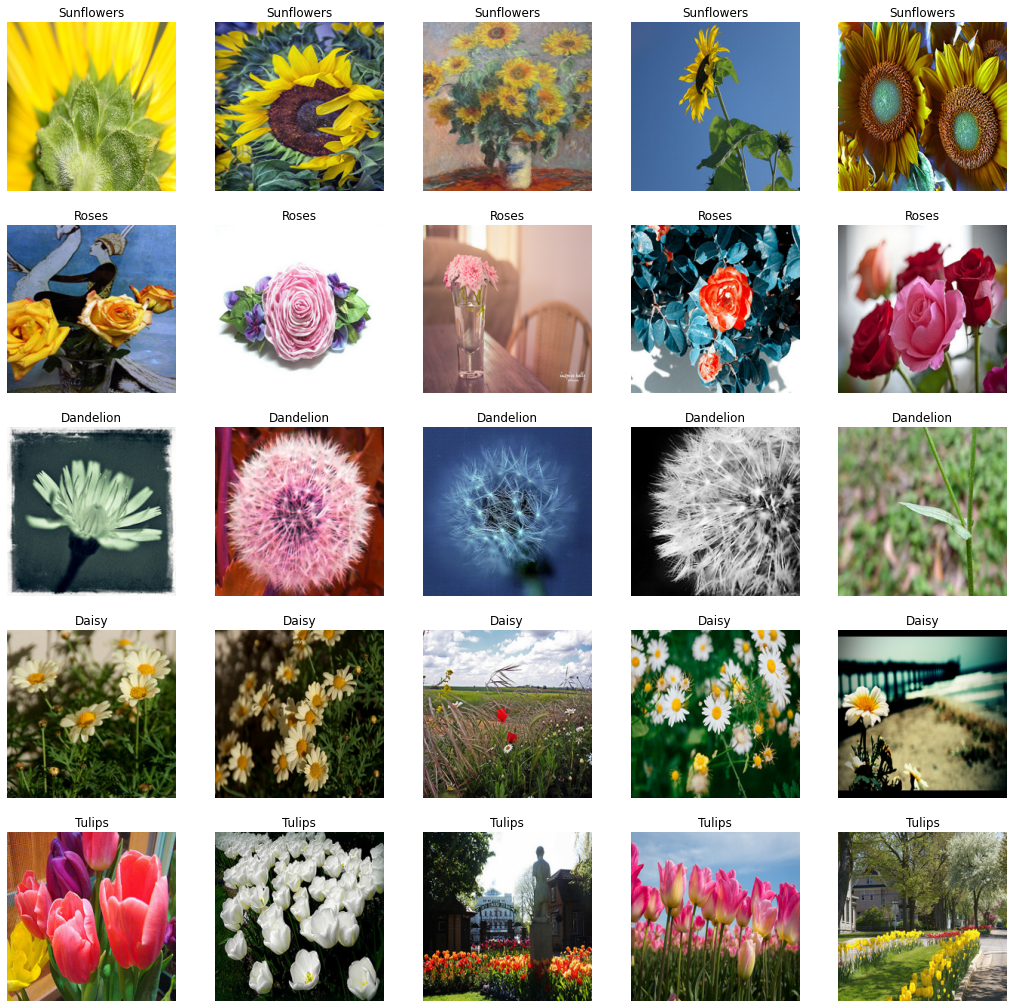

In [4]:
# show some sample image of each class
sub_sunflowers = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
sub_roses = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
sub_dandelion = (train_data[train_data['label']==2]['image'].iloc[:5]).tolist()
sub_daisy = (train_data[train_data['label']==3]['image'].iloc[:5]).tolist()
sub_tulips = (train_data[train_data['label']==4]['image'].iloc[:5]).tolist()

sample_path = sub_sunflowers + sub_roses + sub_dandelion + sub_daisy + sub_tulips
sample_label = [0] * 5 + [1] * 5 + [2] * 5 + [3] * 5 + [4] * 5



f, ax = plt.subplots(5, 5, figsize=(18, 18))
for n, (img_path, img_label) in enumerate(zip(sample_path, sample_label)):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(np.array(Image.open(str(img_path)).resize((224, 224))))
    plt.title(classes_name[img_label].title())
    plt.axis('off')
    
    
